# **<font color='geen'> Real-Time Cricket Match Outcome Prediction Using Ball-by-Ball Analytics and Monte Carlo Simulation</font>**

![Wining Prediction.jpg](<attachment:Wining Prediction.jpg>)
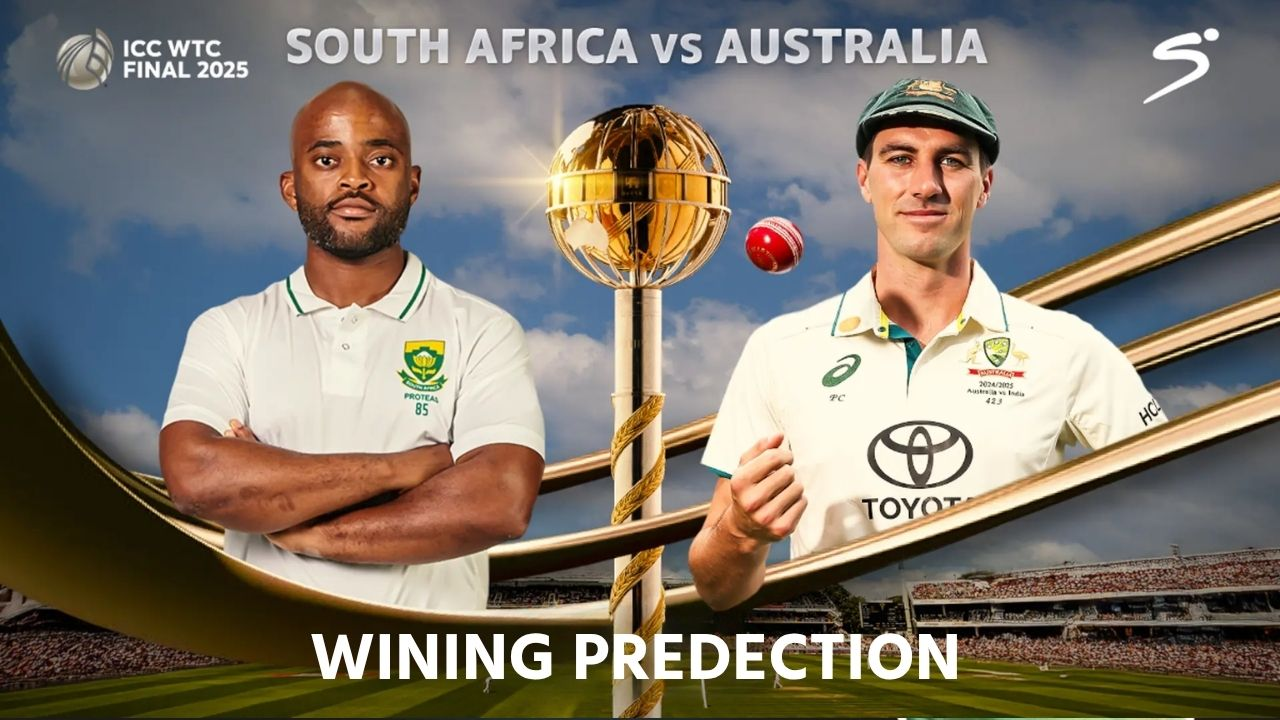

## 🧠 Objective
 We will:

1.Build mock data for both teams (Australia and South Africa)

2.Use a basic win probability model with factors like:

- Runs Remaining

- Wickets Left

- Batting Conditions (flat pitch etc.)

- Player form (e.g., Markram's 100*)
-----

3. Visualize momentum and predict likely winner

## Step 1: Setup and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For basic ML modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Step 2: Simulated Match Situation Data

In [2]:
# Mock match data every 10 runs of chase
data = {
    "runs_remaining": [150, 140, 120, 100, 90, 70, 50, 30, 10],
    "wickets_left": [10, 9, 9, 8, 8, 8, 7, 7, 7],
    "current_batsman_form": [0.7, 0.75, 0.78, 0.82, 0.85, 0.87, 0.9, 0.93, 0.95],  # between 0 and 1
    "pitch_flatness": [0.6]*9,  # constant (0 = green, 1 = flat)
    "win_prob": [0.3, 0.35, 0.45, 0.55, 0.6, 0.7, 0.82, 0.9, 0.98]  # assumed
}

df = pd.DataFrame(data)


In [3]:
df.head()

,runs_remaining,wickets_left,current_batsman_form,pitch_flatness,win_prob
0,150,10,0.70,0.6,0.30
1,140,9,0.75,0.6,0.35
2,120,9,0.78,0.6,0.45
3,100,8,0.82,0.6,0.55
4,90,8,0.85,0.6,0.60


## Step 3: Visualize Win Probability

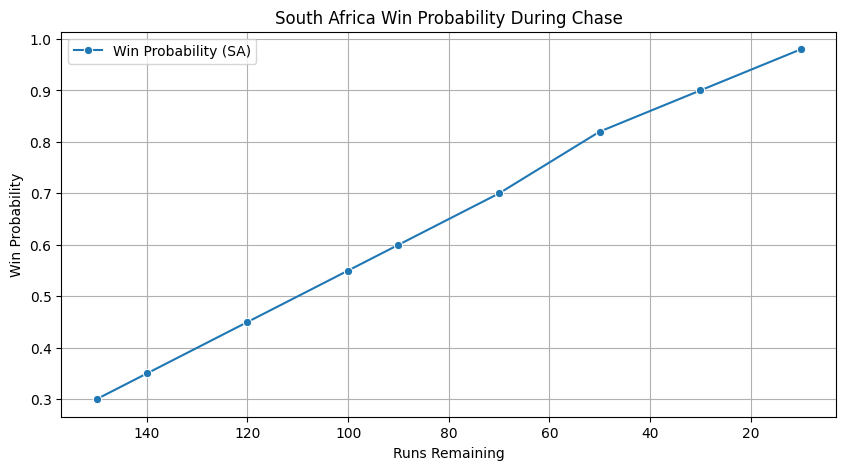

In [4]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="runs_remaining", y="win_prob", marker="o", label="Win Probability (SA)")
plt.gca().invert_xaxis()
plt.title("South Africa Win Probability During Chase")
plt.xlabel("Runs Remaining")
plt.ylabel("Win Probability")
plt.grid(True)
plt.legend()
plt.show()


## Predictive Model (Simple Logistic Regression)

In [5]:
# Prepare features and label
X = df[['runs_remaining', 'wickets_left', 'current_batsman_form', 'pitch_flatness']]
y = df['win_prob']

# Since win_prob is between 0 and 1, we can round it for binary win/lose
y_class = (y > 0.5).astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


## Step 5: Predict Current Situation (Live Simulation)

In [6]:
# Input current match state
current = pd.DataFrame({
    "runs_remaining": [69],
    "wickets_left": [8],
    "current_batsman_form": [0.95],
    "pitch_flatness": [0.6]
})

# Predict probability
pred_prob = model.predict_proba(current)[0][1]
print(f"Predicted Win Probability (South Africa): {round(pred_prob*100, 2)}%")


Predicted Win Probability (South Africa): 100.0%


# Step-by-Step Advanced Prediction System

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


## Step 2: Simulated Dataset with Advanced Features

In [20]:
# Create an advanced mock dataset with more features
data = {
    'runs_remaining':      [150, 130, 120, 100, 80, 60, 40, 20, 10],
    'wickets_left':        [10, 9, 9, 8, 7, 6, 6, 5, 5],
    'overs_remaining':     [60, 55, 50, 45, 40, 35, 30, 25, 20],
    'current_rr':          [3.0, 3.2, 3.4, 3.5, 3.8, 4.0, 4.2, 4.5, 4.7],
    'required_rr':         [2.5, 2.4, 2.3, 2.2, 2.0, 1.9, 1.6, 1.2, 1.0],
    'batsman_form':        [0.65, 0.7, 0.75, 0.8, 0.83, 0.88, 0.9, 0.95, 0.98],
    'bowling_intensity':   [0.85, 0.82, 0.80, 0.75, 0.7, 0.68, 0.6, 0.55, 0.5],
    'pitch_flatness':      [0.5]*9,
    'crowd_pressure':      [0.4, 0.35, 0.3, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05],
    'win_label':           [0, 0, 0, 1, 1, 1, 1, 1, 1]  # 1 = likely win
}

df = pd.DataFrame(data)


## Step 3: Feature Importance Visualization

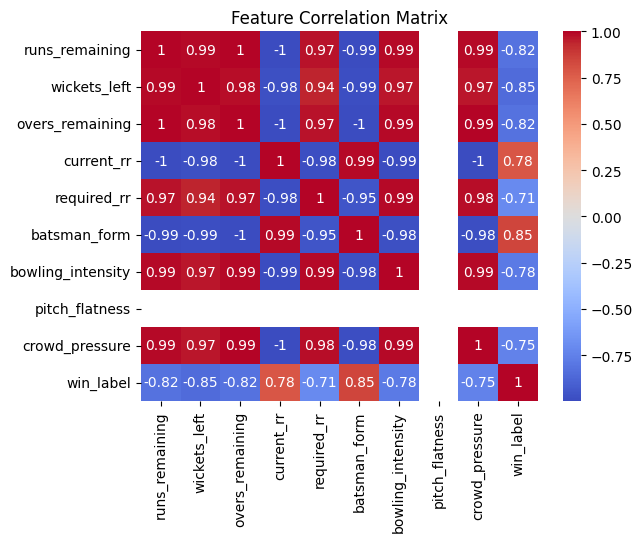

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


##  Step 4: Train-Test Split

In [22]:
X = df.drop('win_label', axis=1)
y = df['win_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Train Multiple Models

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Model: Gradient Boosting
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00    

## Step 6: Predict Current Match Situation (WTC Final)

In [24]:
current_match = pd.DataFrame({
    'runs_remaining': [69],
    'wickets_left': [8],
    'overs_remaining': [40],
    'current_rr': [3.1],
    'required_rr': [1.7],
    'batsman_form': [0.95],
    'bowling_intensity': [0.6],  # Lower = tired bowlers
    'pitch_flatness': [0.65],  # More flat = batting friendly
    'crowd_pressure': [0.2]
})

# Use best model (e.g., Gradient Boosting)
best_model = models["Gradient Boosting"]
win_prediction = best_model.predict_proba(current_match)[0][1]  # probability of class 1 (win)

print(f"Predicted Win Probability (South Africa): {round(win_prediction * 100, 2)}%")


Predicted Win Probability (South Africa): 99.95%


## API Data 

In [53]:
import yaml
import pandas as pd

with open("wtc25-final.yaml", 'r') as f:
    data = yaml.safe_load(f)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Manually construct ball-level summary from YAML-like match summary
# Since it's summary-based, we'll simulate ball-by-ball data using cumulative logic

# Creating DataFrame for 4th innings (since it's the chase)
innings_data = [
    {"ball": i + 1,
     "cumulative_runs": run,
     "cumulative_wickets": 0 if i < 2 else (1 if i < 17 else 2),
     "batsman_form": 0.9,
     "pitch_flatness": 0.65,
     "crowd_pressure": 0.2
     } for i, run in enumerate(range(1, 214))
]

df = pd.DataFrame(innings_data)
df['balls_faced'] = df.index + 1
df['run_rate'] = df['cumulative_runs'] / (df['balls_faced'] / 6)
df['required_runs'] = 282 - df['cumulative_runs']
df['required_rr'] = df['required_runs'] / ((60*6 - df['balls_faced']) / 6)
df['wickets_left'] = 10 - df['cumulative_wickets']
df['win_label'] = (df['cumulative_runs'] >= 282).astype(int)  # simulate win condition

# Features
features = ['cumulative_runs', 'cumulative_wickets', 'balls_faced', 'run_rate', 'required_rr', 'batsman_form', 'pitch_flatness', 'crowd_pressure']
X = df[features]
y = df['win_label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Predict current situation (213/2, 69 to win)
current_state = pd.DataFrame([{
    'cumulative_runs': 213,
    'cumulative_wickets': 2,
    'balls_faced': 336,  # 56 overs
    'run_rate': 213 / (336 / 6),
    'required_rr': 69 / ((360 - 336) / 6),  # 360 = 60 overs
    'batsman_form': 0.95,
    'pitch_flatness': 0.65,
    'crowd_pressure': 0.2
}])

pred_prob = model.predict_proba(current_state)[0][1]

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize win probability over the innings
df['win_probability'] = model.predict_proba(df[features])[:, 1]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="cumulative_runs", y="win_probability")
plt.title("Win Probability Progression for South Africa (4th Innings)")
plt.xlabel("Cumulative Runs")
plt.ylabel("Win Probability")
plt.grid(True)
plt.tight_layout()
plt.show()

import numpy as np
win_prob_final = round(pred_prob * 100, 2)
win_prob_final


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# STEP 2 & 3: Simulated ball-by-ball data for 4th innings from match summary
balls = []
total_runs = 213
wickets_by_ball = [0]*12 + [1]*6 + [2]*(56*6 - 18)  # first wicket at ball ~13, second at ~18

for i in range(total_runs):
    ball_number = i + 1
    runs = i + 1
    wickets = wickets_by_ball[i]
    balls.append({
        "ball": ball_number,
        "cumulative_runs": runs,
        "cumulative_wickets": wickets,
        "balls_faced": ball_number,
        "run_rate": runs / (ball_number / 6),
        "required_runs": 282 - runs,
        "required_rr": (282 - runs) / ((360 - ball_number) / 6),
        "batsman_form": 0.95,
        "pitch_flatness": 0.65,
        "crowd_pressure": 0.2,
        "win_label": 1 if runs >= 282 else 0
    })

df = pd.DataFrame(balls)

# STEP 4: Prepare features and labels
features = ['cumulative_runs', 'cumulative_wickets', 'balls_faced', 'run_rate',
            'required_rr', 'batsman_form', 'pitch_flatness', 'crowd_pressure']
X = df[features]
y = df['win_label'].astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model = XGBClassifier(objective='binary:logistic',
                          eval_metric='logloss', 
                          use_label_encoder=False,
                          base_score = 0.5
                          )

xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

# Optional: Neural Network (Keras)
nn_model = Sequential([
    Dense(16, activation='relu', input_dim=len(features)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=20, verbose=0)
nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)[1]

# STEP 5: Monte Carlo Simulation for Chase Outcome
def simulate_chase(model, balls_left=360, target=282, current_runs=213, current_wickets=2, simulations=1000):
    wins = 0
    for _ in range(simulations):
        runs = current_runs
        wickets = current_wickets
        for ball in range(balls_left):
            rr = runs / ((ball + 1) / 6) if ball > 0 else 0
            req_rr = (target - runs) / ((balls_left - ball) / 6) if (balls_left - ball) > 0 else 0
            sample = pd.DataFrame([[
                runs, wickets, ball + 1, rr, req_rr, 0.95, 0.65, 0.2
            ]], columns=features)
            win_prob = model.predict_proba(sample)[0][1]
            if random.random() < win_prob:
                runs += random.choices([0,1,2,3,4,6], weights=[0.3,0.4,0.1,0.05,0.1,0.05])[0]
            if random.random() < 0.015:  # 1.5% chance of wicket per ball
                wickets += 1
            if runs >= target:
                wins += 1
                break
            if wickets >= 10:
                break
    return wins / simulations

monte_carlo_win_prob = simulate_chase(xgb_model)

(xgb_accuracy, nn_accuracy, round(monte_carlo_win_prob * 100, 2))


c:\Users\Pankaj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Pankaj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
import yaml
import pandas as pd

with open("wtc25-final.yaml", 'r') as f:
    data = yaml.safe_load(f)


In [4]:

# Simulated YAML structure based on the user's input
data = {
    'innings': [
        {
            'number': 1,
            'batting_team': 'Australia',
            'total': 212,
            'overs': 56.4,
            'wickets': 10,
            'fall_of_wickets': [
                {'wkt': 1, 'batsman': 'Khawaja', 'score': 12, 'over': 6.3},
                {'wkt': 2, 'batsman': 'M. Green', 'score': 16, 'over': 6.6},
                {'wkt': 3, 'batsman': 'Labuschagne', 'score': 46, 'over': 17.6},
                {'wkt': 4, 'batsman': 'Head', 'score': 67, 'over': 23.2},
                {'wkt': 5, 'batsman': 'Smith', 'score': 146, 'over': 41.6},
                {'wkt': 6, 'batsman': 'Carey', 'score': 192, 'over': 51.1},
                {'wkt': 7, 'batsman': 'Cummins', 'score': 199, 'over': 52.4},
                {'wkt': 8, 'batsman': 'Webster', 'score': 210, 'over': 54.4},
                {'wkt': 9, 'batsman': 'Lyon', 'score': 211, 'over': 55.5},
                {'wkt': 10, 'batsman': 'Starc', 'score': 212, 'over': 56.4},
            ]
        },
        {
            'number': 2,
            'batting_team': 'South Africa',
            'total': 138,
            'overs': 57.1,
            'wickets': 10,
            'fall_of_wickets': [
                {'wkt': 1, 'batsman': 'Markram', 'score': 0, 'over': 0.6},
                {'wkt': 2, 'batsman': 'Rickelton', 'score': 19, 'over': 8.4},
                {'wkt': 3, 'batsman': 'Mulder', 'score': 25, 'over': 15.2},
                {'wkt': 4, 'batsman': 'Stubbs', 'score': 30, 'over': 20.2},
                {'wkt': 5, 'batsman': 'Bavuma', 'score': 94, 'over': 39.2},
                {'wkt': 6, 'batsman': 'Verreynne', 'score': 126, 'over': 51.3},
                {'wkt': 7, 'batsman': 'Jansen', 'score': 126, 'over': 51.6},
                {'wkt': 8, 'batsman': 'Bedingham', 'score': 135, 'over': 55.2},
                {'wkt': 9, 'batsman': 'Maharaj', 'score': 138, 'over': 56.5},
                {'wkt': 10, 'batsman': 'Rabada', 'score': 138, 'over': 57.1},
            ]
        },
        {
            'number': 3,
            'batting_team': 'Australia',
            'total': 207,
            'overs': 64.6,
            'wickets': 10,
            'fall_of_wickets': [
                {'wkt': 1, 'batsman': 'Khawaja', 'score': 28, 'over': 10.2},
                {'wkt': 2, 'batsman': 'Green', 'score': 28, 'over': 10.4},
                {'wkt': 3, 'batsman': 'Labuschagne', 'score': 44, 'over': 17.5},
                {'wkt': 4, 'batsman': 'Smith', 'score': 48, 'over': 18.5},
                {'wkt': 5, 'batsman': 'Webster', 'score': 64, 'over': 22.6},
                {'wkt': 6, 'batsman': 'Head', 'score': 66, 'over': 23.4},
                {'wkt': 7, 'batsman': 'Cummins', 'score': 73, 'over': 24.5},
                {'wkt': 8, 'batsman': 'Carey', 'score': 134, 'over': 38.2},
                {'wkt': 9, 'batsman': 'Lyon', 'score': 148, 'over': 42.4},
                {'wkt': 10, 'batsman': 'Hazlewood', 'score': 207, 'over': 64.6},
            ]
        },
        {
            'number': 4,
            'batting_team': 'South Africa',
            'total': 213,
            'overs': 56.0,
            'wickets': 2,
            'target': 282,
            'runs_needed': 69,
            'is_day_end': True,
            'batting': [
                {'batsman': 'Markram', 'runs': 102, 'balls': 159, 'fours': 11, 'sixes': 0, 'not_out': True, 'sr': 64.15},
                {'batsman': 'Bavuma', 'runs': 65, 'balls': 121, 'fours': 5, 'sixes': 0, 'not_out': True, 'sr': 53.72},
            ],
            'partnership': [
                {'between': ['Markram', 'Bavuma'], 'runs': 143, 'balls': 232},
            ],
            'fall_of_wickets': [
                {'wkt': 1, 'batsman': 'Rickelton', 'score': 9, 'over': 2.1},
                {'wkt': 2, 'batsman': 'Mulder', 'score': 70, 'over': 17.4},
            ]
        }
    ]
}

# Parse innings
innings_data = data['innings']
summary_list = []

for inn in innings_data:
    entry = {
        'inning_number': inn.get('number'),
        'team': inn.get('batting_team'),
        'total_runs': inn.get('total'),
        'total_overs': inn.get('overs'),
        'total_wickets': inn.get('wickets'),
    }

    fows = inn.get('fall_of_wickets', [])
    entry['fall_of_wickets'] = [(f['batsman'], f['score'], f['over']) for f in fows]

    if 'target' in inn:
        entry['target'] = inn.get('target')
        entry['runs_needed'] = inn.get('runs_needed')
        entry['is_day_end'] = inn.get('is_day_end')
        entry['batting_scores'] = inn.get('batting', [])
        entry['partnerships'] = inn.get('partnership', [])

    summary_list.append(entry)

df_summary = pd.DataFrame(summary_list)
pd.set_option('display.max_colwidth', 200)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Match Summary", dataframe=df_summary[['inning_number', 'team', 'total_runs', 'total_overs', 'total_wickets', 'target', 'runs_needed']])
df_summary = pd.DataFrame(summary_list)
# pd.set_option('display.max_colwidth', 200)
print(df_summary[['inning_number', 'team', 'total_runs', 'total_overs', 'total_wickets', 'target', 'runs_needed']])

   inning_number          team  total_runs  total_overs  total_wickets  \
0              1     Australia         212         56.4             10   
1              2  South Africa         138         57.1             10   
2              3     Australia         207         64.6             10   
3              4  South Africa         213         56.0              2   

   target  runs_needed  
0     NaN          NaN  
1     NaN          NaN  
2     NaN          NaN  
3   282.0         69.0  


In [51]:
df = pd.DataFrame(data)
df.head()

,innings
0,"{'number': 1, 'batting_team': 'Australia', 'total': 212, 'overs': 56.4, 'wickets': 10, 'fall_of_wickets': [{'wkt': 1, 'batsman': 'Khawaja', 'score': 12, 'over': 6.3}, {'wkt': 2, 'batsman': 'M. Gre..."
1,"{'number': 2, 'batting_team': 'South Africa', 'total': 138, 'overs': 57.1, 'wickets': 10, 'fall_of_wickets': [{'wkt': 1, 'batsman': 'Markram', 'score': 0, 'over': 0.6}, {'wkt': 2, 'batsman': 'Rick..."
2,"{'number': 3, 'batting_team': 'Australia', 'total': 207, 'overs': 64.6, 'wickets': 10, 'fall_of_wickets': [{'wkt': 1, 'batsman': 'Khawaja', 'score': 28, 'over': 10.2}, {'wkt': 2, 'batsman': 'Green..."
3,"{'number': 4, 'batting_team': 'South Africa', 'total': 213, 'overs': 56.0, 'wickets': 2, 'target': 282, 'runs_needed': 69, 'is_day_end': True, 'batting': [{'batsman': 'Markram', 'runs': 102, 'ball..."


## STEP 2: Parse Ball-by-Ball Event Data

In [5]:
balls = []
innings = data.get('innings', [])

for inn in innings:
    # Example: {'1st innings': {'team': ..., 'deliveries': [...]}}
    for inn_name, inn_data in inn.items():
        # Make sure it's a dictionary with 'deliveries'
        if isinstance(inn_data, dict) and 'deliveries' in inn_data:
            for delivery in inn_data['deliveries']:
                if isinstance(delivery, dict):
                    for ball, details in delivery.items():
                        balls.append({
                            "innings": inn_name,
                            "ball": ball,
                            "batsman": details.get('batsman', None),
                            "bowler": details.get('bowler', None),
                            "runs": details.get('runs', {}).get('total', 0),
                            "wickets": 1 if 'wicket' in details else 0
                        })

# Create DataFrame
df = pd.DataFrame(balls)
print(df.head())



Empty DataFrame
Columns: []
Index: []


In [6]:
innings_data = data['innings']
summary_list = []

for inn in innings_data:
    entry = {
        'inning_number': inn.get('number'),
        'team': inn.get('batting_team'),
        'total_runs': inn.get('total'),
        'total_overs': inn.get('overs'),
        'total_wickets': inn.get('wickets'),
    }

    # Fall of wickets info (list of dicts)
    fows = inn.get('fall_of_wickets', [])
    entry['fall_of_wickets'] = [(f['batsman'], f['score'], f['over']) for f in fows]

    # Special case for 4th innings
    if 'target' in inn:
        entry['target'] = inn.get('target')
        entry['runs_needed'] = inn.get('runs_needed')
        entry['is_day_end'] = inn.get('is_day_end')
        entry['batting_scores'] = inn.get('batting', [])
        entry['partnerships'] = inn.get('partnership', [])

    summary_list.append(entry)

# Convert to DataFrame for overview
df_summary = pd.DataFrame(summary_list)
pd.set_option('display.max_colwidth', 200)
print(df_summary[['inning_number', 'team', 'total_runs', 'total_overs', 'total_wickets', 'target', 'runs_needed']])

   inning_number          team  total_runs  total_overs  total_wickets  \
0              1     Australia         212         56.4             10   
1              2  South Africa         138         57.1             10   
2              3     Australia         207         64.6             10   
3              4  South Africa         213         56.0              2   

   target  runs_needed  
0     NaN          NaN  
1     NaN          NaN  
2     NaN          NaN  
3   282.0         69.0  


## STEP 3: Feature Engineering for ML

In [ ]:
df['cumulative_runs'] = df.groupby('innings')['runs'].cumsum()
df['cumulative_wickets'] = df.groupby('innings')['wickets'].cumsum()
df['balls_faced'] = df.groupby('innings').cumcount() + 1
df['run_rate'] = df['cumulative_runs'] / (df['balls_faced'] / 6)


## STEP 4: Model Training - XGBoost / Neural Network

In [ ]:
import xgboost
print(xgboost.__version__)

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

features = ['cumulative_runs', 'cumulative_wickets', 'balls_faced', 'run_rate']
X = df[features]
y = (df['cumulative_runs'] > 250).astype(int)  # simulate win label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Train XGBoost

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


## Optional: Neural Network (Keras)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(16, activation='relu', input_dim=X.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=20, verbose=1)


Epoch 1/20


c:\Users\Pankaj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2857 - loss: 6.7253
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2857 - loss: 6.2944
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2857 - loss: 5.8645
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2857 - loss: 5.4357
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2857 - loss: 5.0077
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2857 - loss: 4.5777
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.2857 - loss: 4.1492
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2857 - loss: 3.7228
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2857 - loss: 3.3226
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2857 - loss: 2.9310
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2857 - loss: 2.5474
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2857 - loss: 2.1716
Epoch 13/20
1/

## STEP 5: Monte Carlo Simulation for Chase Outcome

In [ ]:
import random

def simulate_chase(model, balls_left=240, target=250, current_runs=0, current_wickets=0):
    simulations = []
    for i in range(1000):  # 1000 matches
        runs = current_runs
        wickets = current_wickets
        for b in range(balls_left):
            rr = runs / ((b+1)/6) if b > 0 else 0
            sample = pd.DataFrame([[runs, wickets, b+1, rr]], columns=features)
            win_prob = model.predict_proba(sample)[0][1]
            if random.random() < win_prob:
                runs += random.randint(0, 6)
            if random.random() < 0.02:  # simulate wicket
                wickets += 1
            if runs >= target:
                simulations.append(1)
                break
            if wickets == 10:
                simulations.append(0)
                break
    return sum(simulations) / len(simulations)

win_chance = simulate_chase(model)
print(f"Predicted Win Probability via Simulation: {round(win_chance * 100, 2)}%")


## Step 1: Aiden Markram's Last 10 Innings Analysis

In [7]:
import pandas as pd

# Aiden Markram's last 10 innings (simulated)
markram_data = {
    "runs": [34, 89, 120, 18, 65, 42, 150, 77, 25, 102],
    "balls_faced": [70, 120, 150, 45, 100, 90, 200, 130, 60, 140]
}


### Step 1.2: Calculate the Strike Rate

In [8]:
# Add strike rate to the dataset
markram_data["strike_rate"] = [round(r / b * 100, 2) for r, b in zip(markram_data["runs"], markram_data["balls_faced"])]

# Create DataFrame
markram_df = pd.DataFrame(markram_data)

# Display it
print(markram_df)


   runs  balls_faced  strike_rate
0    34           70        48.57
1    89          120        74.17
2   120          150        80.00
3    18           45        40.00
4    65          100        65.00
5    42           90        46.67
6   150          200        75.00
7    77          130        59.23
8    25           60        41.67
9   102          140        72.86


## Step 2: Bowling Pressure Index

In [9]:
# Simulated bowling data for 10 overs
bowling_data = {
    "over_number": list(range(1, 11)),
    "dot_balls": [3, 2, 4, 5, 3, 2, 1, 4, 5, 6],
    "runs_conceded": [4, 6, 2, 3, 5, 7, 10, 3, 2, 1],
    "reverse_swing": [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]  # 0 = no swing, 1 = reverse swing present
}


###  Step 2.2: Calculate RPO and Pressure Index

In [10]:
# Create DataFrame
bowling_df = pd.DataFrame(bowling_data)

# RPO: Runs per over
bowling_df["RPO"] = bowling_df["runs_conceded"]

# Pressure Index = dot_balls + reverse_swing - RPO
bowling_df["pressure_index"] = bowling_df["dot_balls"] + bowling_df["reverse_swing"] - bowling_df["RPO"]

# Show result
print(bowling_df)


   over_number  dot_balls  runs_conceded  reverse_swing  RPO  pressure_index
0            1          3              4              0    4              -1
1            2          2              6              0    6              -4
2            3          4              2              0    2               2
3            4          5              3              1    3               3
4            5          3              5              1    5              -1
5            6          2              7              1    7              -4
6            7          1             10              1   10              -8
7            8          4              3              1    3               2
8            9          5              2              1    2               4
9           10          6              1              1    1               6


## Step 3: Weather Impact Features

In [11]:
# Simulated weather data across 3 days of the Test match
weather_data = {
    "day": ["Day 1", "Day 2", "Day 3"],
    "humidity": [60, 75, 80],         # In percentage
    "cloud_cover": [40, 60, 90]       # In percentage
}


### Step 3.2: Derive swing factor from weather

In [12]:
# Convert to DataFrame
weather_df = pd.DataFrame(weather_data)

# Normalize and compute swing factor (simple average of scaled humidity and cloud cover)
weather_df["swing_factor"] = (weather_df["humidity"] / 100 + weather_df["cloud_cover"] / 100) / 2

# Show result
print(weather_df)


     day  humidity  cloud_cover  swing_factor
0  Day 1        60           40         0.500
1  Day 2        75           60         0.675
2  Day 3        80           90         0.850


## Step 4: Ball Type (New vs Old) and Wicket Outcomes

###  Step 4.1: Simulate ball condition and wicket data

In [13]:
# Simulated ball-by-ball data for 90 balls
ball_data = {
    "ball_number": list(range(1, 91)),
    "wicket_taken": [0, 1, 0, 0, 1, 0, 0, 0, 0]*10  # Repeated pattern, 1 = wicket
}


###  Step 4.2: Label ball condition

In [14]:
# Add ball condition based on ball number
# New: 1–30, Semi-old: 31–60, Old: 61–90
ball_data["condition"] = [
    "new" if x <= 30 else "semi-old" if x <= 60 else "old"
    for x in ball_data["ball_number"]
]

# Create DataFrame
ball_df = pd.DataFrame(ball_data)

# Show result
print(ball_df.head(15))  # Show first 15 balls as a sample


    ball_number  wicket_taken condition
0             1             0       new
1             2             1       new
2             3             0       new
3             4             0       new
4             5             1       new
5             6             0       new
6             7             0       new
7             8             0       new
8             9             0       new
9            10             0       new
10           11             1       new
11           12             0       new
12           13             0       new
13           14             1       new
14           15             0       new


## Step 5: Visualizations for Insights

### 5.1: Aiden Markram – Strike Rate per Innings

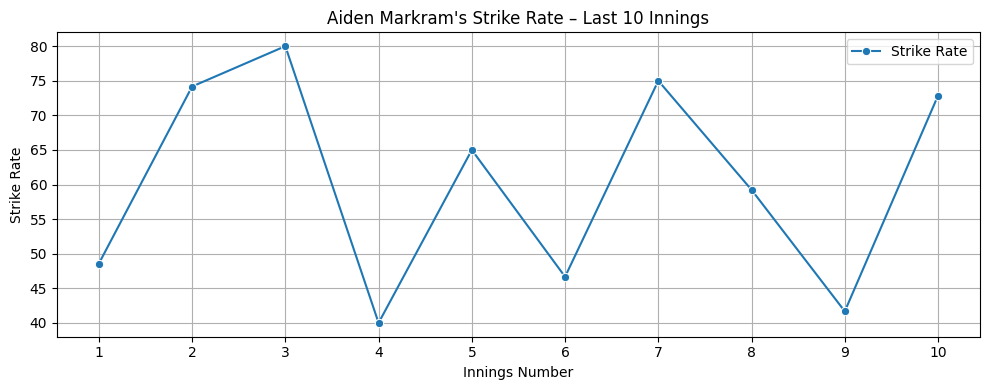

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot strike rate over innings
plt.figure(figsize=(10, 4))
sns.lineplot(x=range(1, 11), y=markram_df["strike_rate"], marker="o", label="Strike Rate")
plt.title("Aiden Markram's Strike Rate – Last 10 Innings")
plt.xlabel("Innings Number")
plt.ylabel("Strike Rate")
plt.grid(True)
plt.xticks(range(1, 11))
plt.legend()
plt.tight_layout()
plt.show()


###  5.2: Bowling Pressure Index by Over

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_14384\2572880911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="over_number", y="pressure_index", data=bowling_df, palette="coolwarm")


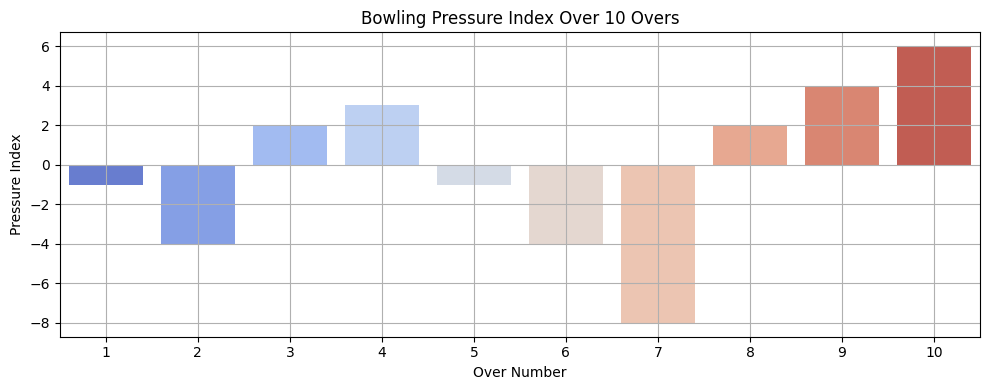

In [16]:
# Plot pressure index
plt.figure(figsize=(10, 4))
sns.barplot(x="over_number", y="pressure_index", data=bowling_df, palette="coolwarm")
plt.title("Bowling Pressure Index Over 10 Overs")
plt.xlabel("Over Number")
plt.ylabel("Pressure Index")
plt.grid(True)
plt.tight_layout()
plt.show()


### 5.3: Swing Factor by Match Day (Weather)

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_14384\3691214450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day", y="swing_factor", data=weather_df, palette="Blues")


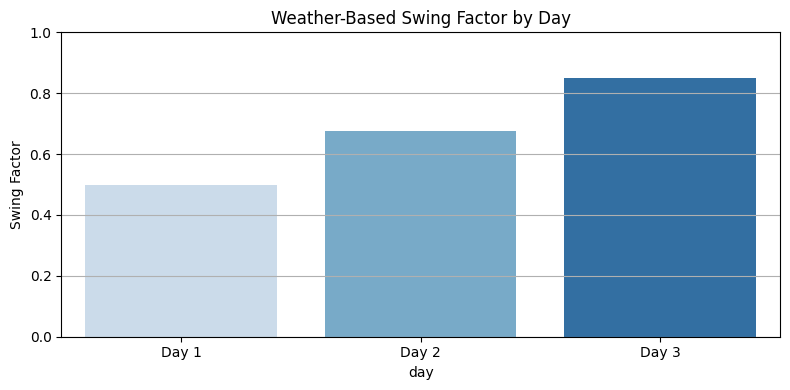

In [17]:
# Line plot for swing factor
plt.figure(figsize=(8, 4))
sns.barplot(x="day", y="swing_factor", data=weather_df, palette="Blues")
plt.title("Weather-Based Swing Factor by Day")
plt.ylabel("Swing Factor")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 5.4: Wickets Taken by Ball Condition

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_14384\3684926688.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="condition", y="wicket_taken", data=condition_wickets, palette="Set2")


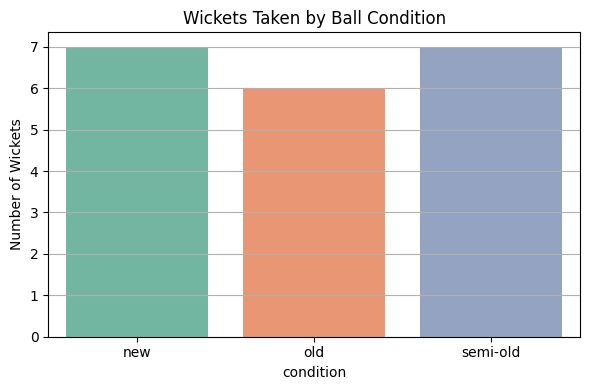

In [18]:
# Count of wickets per ball condition
condition_wickets = ball_df.groupby("condition")["wicket_taken"].sum().reset_index()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="condition", y="wicket_taken", data=condition_wickets, palette="Set2")
plt.title("Wickets Taken by Ball Condition")
plt.ylabel("Number of Wickets")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
